# INSY695 - Group Project
### Visualization - Bogdan Tanasie

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bpd_df = pd.read_csv('BPD_CRIME_DATA_CLEAN.csv')

In [5]:
bpd_df.shape 

(276529, 18)

In [7]:
bpd_df.head(3)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Season,Month,Hour
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,summer,9,23
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,Outside,NONE,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,summer,9,23
2,2017-09-02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,summer,9,22


In [8]:
bpd_df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents',
       'Season', 'Month', 'Hour'],
      dtype='object')

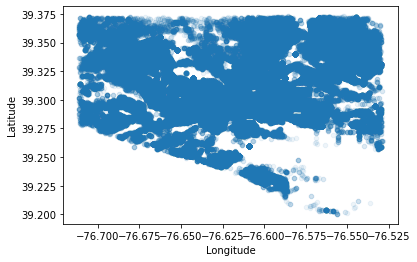

In [17]:
bpd_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.075)

In [39]:
bpd_df['Type_By_Neighborhood'] = bpd_df.groupby(['Neighborhood'])['Total Incidents'].transform('count')
bpd_df['Type_By_Neighborhood']

0         4516.0
1         2426.0
2          471.0
3         2653.0
4         1071.0
           ...  
276524     969.0
276525    6642.0
276526    1181.0
276527    1873.0
276528    2021.0
Name: Type_By_Neighborhood, Length: 276529, dtype: float64

In [64]:
# Going to look at the top wepon per region
bpd_weapons_df = bpd_df.groupby(['Neighborhood', 'Weapon'])['Total Incidents'].agg(pd.Series.count).to_frame()
bpd_weapons_df

Total Incidents
Neighborhood  Weapon                  
Abell         FIREARM               64
              HANDS                 96
              KNIFE                 23
              NONE                 496
              OTHER                 29
...                                ...
York-Homeland FIREARM                6
              HANDS                 29
              KNIFE                 10
              NONE                 118
              OTHER                 11

[1358 rows x 1 columns]

In [ ]:
# Create map with groups and histogram